In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print("TensorFlow Version : ", tf.__version__)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

TensorFlow Version :  2.16.1


In [2]:
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
  return x * TRUE_W + TRUE_B

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = f(x) + noise
#print(y)

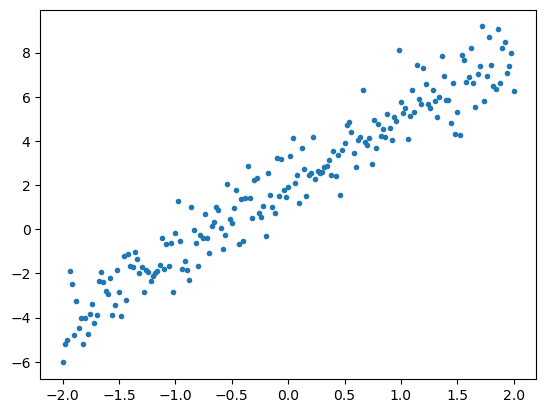

In [3]:
# Plot all the data
plt.plot(x, y, '.')
plt.show()

In [4]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

# List the variables tf.modules's built-in variable aggregation.
print("Variables:", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [5]:
# This computes a single loss value for an entire batch
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

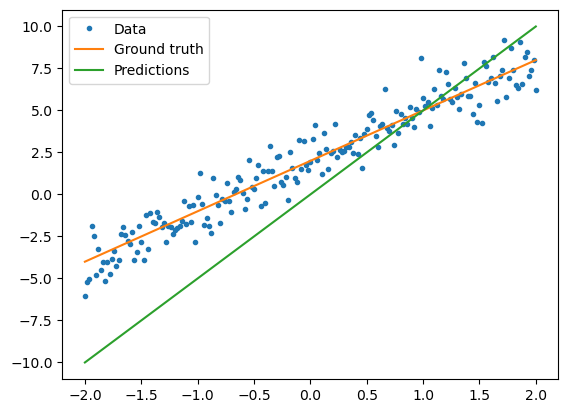

Current loss: 10.001712


In [6]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % loss(y, model(x)).numpy())

In [7]:
# Given a callable model, inputs, outputs, and a learning rate...
def train(model, x, y, learning_rate):

  with tf.GradientTape() as t:
    # Trainable variables are automatically tracked by GradientTape
    current_loss = loss(y, model(x))

  # Use GradientTape to calculate the gradients with respect to W and b
  dw, db = t.gradient(current_loss, [model.w, model.b])

  # Subtract the gradient scaled by the learning rate
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

In [8]:
model = MyModel()

# Collect the history of W-values and b-values to plot later
weights = []
biases = []
epochs = range(10)

# Define a training loop
def report(model, loss):
  return f"W = {model.w.numpy():1.2f}, b = {model.b.numpy():1.2f}, loss={loss:2.5f}"


def training_loop(model, x, y):

  for epoch in epochs:
    # Update the model with the single giant batch
    train(model, x, y, learning_rate=0.1)

    # Track this before I update
    weights.append(model.w.numpy())
    biases.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print(f"Epoch {epoch:2d}:")
    print("    ", report(model, current_loss))

In [9]:
current_loss = loss(y, model(x))

print(f"Starting:")
print("    ", report(model, current_loss))

training_loop(model, x, y)

Starting:
     W = 5.00, b = 0.00, loss=10.00171
Epoch  0:
     W = 4.48, b = 0.40, loss=6.19221
Epoch  1:
     W = 4.10, b = 0.72, loss=4.00476
Epoch  2:
     W = 3.82, b = 0.98, loss=2.73861
Epoch  3:
     W = 3.61, b = 1.18, loss=1.99970
Epoch  4:
     W = 3.46, b = 1.35, loss=1.56494
Epoch  5:
     W = 3.36, b = 1.48, loss=1.30706
Epoch  6:
     W = 3.28, b = 1.58, loss=1.15288
Epoch  7:
     W = 3.22, b = 1.67, loss=1.06001
Epoch  8:
     W = 3.18, b = 1.74, loss=1.00367
Epoch  9:
     W = 3.14, b = 1.79, loss=0.96927


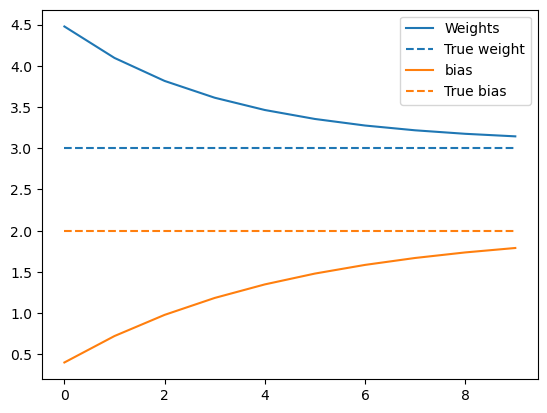

In [10]:
plt.plot(epochs, weights, label='Weights', color=colors[0])
plt.plot(epochs, [TRUE_W] * len(epochs), '--',
         label = "True weight", color=colors[0])

plt.plot(epochs, biases, label='bias', color=colors[1])
plt.plot(epochs, [TRUE_B] * len(epochs), "--",
         label="True bias", color=colors[1])

plt.legend()
plt.show()

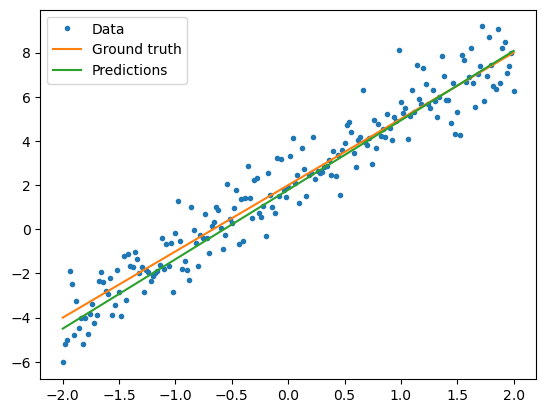

Current loss: 0.969271


In [11]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

In [12]:
class MyModelKeras(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def call(self, x):
    return self.w * x + self.b

keras_model = MyModelKeras()

# Reuse the training loop with a Keras model
training_loop(keras_model, x, y)

# You can also save a checkpoint using Keras's built-in support
keras_model.save_weights("./ckpt/my_checkpoint.weights.h5")

Epoch  0:
     W = 4.48, b = 0.40, loss=6.19221
Epoch  1:
     W = 4.10, b = 0.72, loss=4.00476
Epoch  2:
     W = 3.82, b = 0.98, loss=2.73861
Epoch  3:
     W = 3.61, b = 1.18, loss=1.99970
Epoch  4:
     W = 3.46, b = 1.35, loss=1.56494
Epoch  5:
     W = 3.36, b = 1.48, loss=1.30706
Epoch  6:
     W = 3.28, b = 1.58, loss=1.15288
Epoch  7:
     W = 3.22, b = 1.67, loss=1.06001
Epoch  8:
     W = 3.18, b = 1.74, loss=1.00367
Epoch  9:
     W = 3.14, b = 1.79, loss=0.96927


In [13]:
keras_model = MyModelKeras()

# compile sets the training parameters
keras_model.compile(
    # By default, fit() uses tf.function().  You can
    # turn that off for debugging, but it is on now.
    run_eagerly=False,

    # Using a built-in optimizer, configuring as an object
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),

    # Keras comes with built-in MSE error
    # However, you could use the loss function
    # defined above
    loss=tf.keras.losses.MeanSquaredError,
)

In [15]:
print(x.shape[0])
keras_model.fit(x, y, epochs=10, batch_size=1000)

201
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.0017
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.0017
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.0017
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.0017
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.0017
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.0017
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.0017
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.0017
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.0017
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.0017


In [16]:
print(x.shape[0])
keras_model.fit(x, y, epochs=10, batch_size=32)

201
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 10.1647
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.1567 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 9.5939
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 10.0550
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.4830 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.0365 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 9.4146
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 9.5657
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 10.1018
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.2000


In [17]:
print(x.shape[0])
history = keras_model.fit(x, y, epochs=10, batch_size=32)

201
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 9.3351
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.2517 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 9.6212
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 10.1318
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 9.4151
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.1592 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.7983 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8227 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 9.6535
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 9.6599
